In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = df_long = pd.read_csv('../data/processed/df_long.csv')

--- TABLA 1: PROMEDIO GLOBAL POR GAP VS AZAR ---
 Gap  count  mean   std  Diff_vs_50%
   0    121 0.617 0.346        0.117
1000    121 0.328 0.378       -0.172
1200    121 0.300 0.371       -0.200
2000    121 0.223 0.340       -0.277
2400    121 0.176 0.298       -0.324

--- TABLA 2: PRIMERA APARICIÓN POR GAP VS AZAR ---
 Gap_Size  count  mean   std  Diff_vs_50%
        0    121 0.512 0.502        0.012
     1000    121 0.355 0.481       -0.145
     1200    121 0.289 0.455       -0.211
     2000    121 0.190 0.394       -0.310
     2400    121 0.182 0.387       -0.318


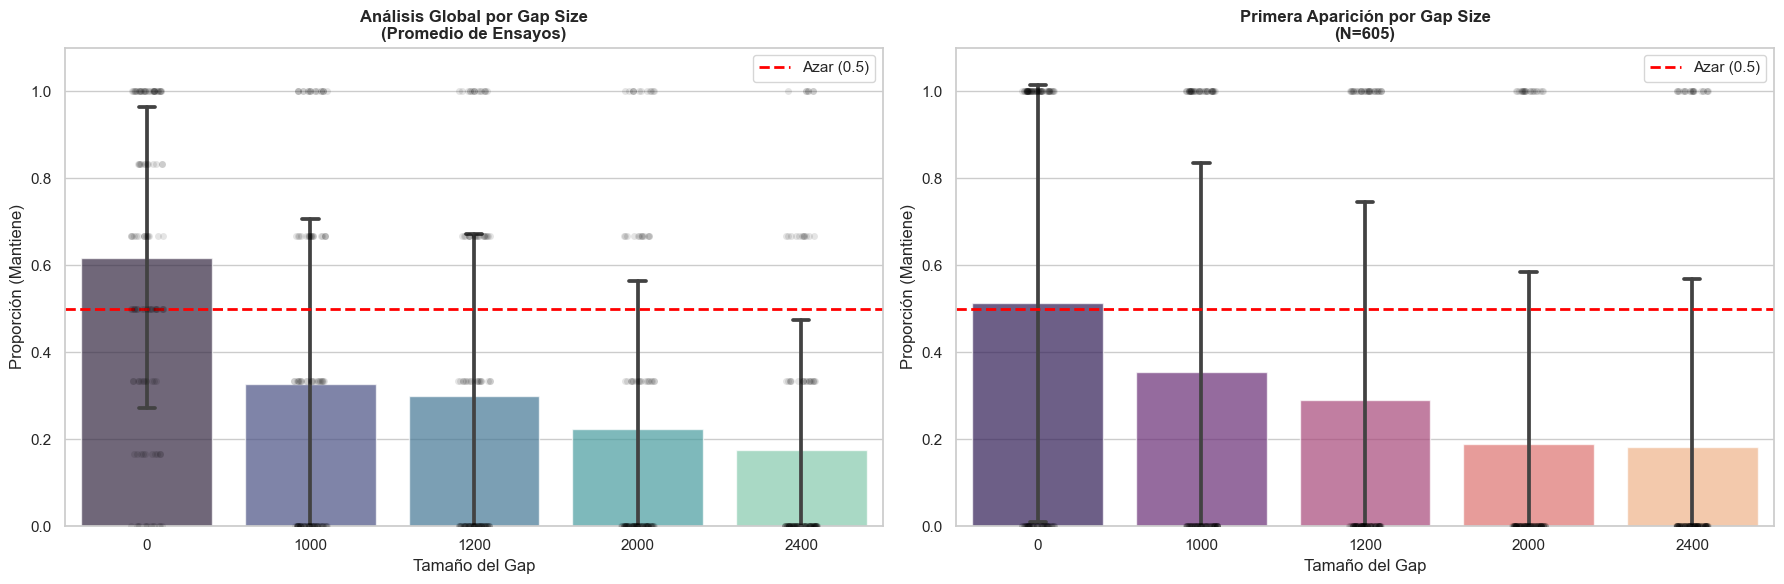

In [3]:


# --- 1. PREPARACIÓN DE DATOS ---

# A. Datos para PROMEDIOS GLOBALES por Gap
cols_gap = [c for c in df.columns if c.startswith('Promedio_Gap_')]
df_unicos = df.drop_duplicates(subset=['ID_Sujeto'])[['ID_Sujeto'] + cols_gap]
df_plot_global = df_unicos.melt(id_vars='ID_Sujeto', value_vars=cols_gap,
                                var_name='Gap_Col', value_name='Valor')
df_plot_global['Gap'] = df_plot_global['Gap_Col'].str.extract('(\d+)').astype(int)

# B. Datos para PRIMERA APARICIÓN por Gap
df_primera = df.drop_duplicates(subset=['ID_Sujeto', 'Gap_Size'], keep='first').copy()

# --- 2. GENERACIÓN DE TABLAS (Comparación vs 0.5) ---

print("--- TABLA 1: PROMEDIO GLOBAL POR GAP VS AZAR ---")
t1 = df_plot_global.groupby('Gap')['Valor'].agg(['count', 'mean', 'std']).reset_index()
t1['Diff_vs_50%'] = (t1['mean'] - 0.5).round(3)
print(t1.round(3).to_string(index=False))

print("\n--- TABLA 2: PRIMERA APARICIÓN POR GAP VS AZAR ---")
t2 = df_primera.groupby('Gap_Size')['Mantiene'].agg(['count', 'mean', 'std']).reset_index()
t2['Diff_vs_50%'] = (t2['mean'] - 0.5).round(3)
print(t2.round(3).to_string(index=False))

# --- 3. VISUALIZACIÓN INTEGRADA ---

sns.set_theme(style="whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# GRÁFICO 1: ANÁLISIS GLOBAL (Promedio de todos los ensayos)
sns.barplot(data=df_plot_global, x='Gap', y='Valor', errorbar='sd', 
            capsize=.1, palette='mako', alpha=0.7, ax=ax1)
sns.stripplot(data=df_plot_global, x='Gap', y='Valor', color='black', 
              alpha=0.1, jitter=True, ax=ax1)
ax1.axhline(0.5, color='red', linestyle='--', linewidth=2, label='Azar (0.5)')
ax1.set_title('Análisis Global por Gap Size\n(Promedio de Ensayos)', fontsize=12, fontweight='bold')

# GRÁFICO 2: PRIMERA APARICIÓN (Reacción inicial al costo)
sns.barplot(data=df_primera, x='Gap_Size', y='Mantiene', errorbar='sd', 
            capsize=.1, palette='magma', alpha=0.7, ax=ax2)
sns.stripplot(data=df_primera, x='Gap_Size', y='Mantiene', color='black', 
              alpha=0.1, jitter=True, ax=ax2)
ax2.axhline(0.5, color='red', linestyle='--', linewidth=2, label='Azar (0.5)')
ax2.set_title('Primera Aparición por Gap Size\n(N=605)', fontsize=12, fontweight='bold')

# Ajustes comunes
for ax in [ax1, ax2]:
    ax.set_ylabel('Proporción (Mantiene)')
    ax.set_xlabel('Tamaño del Gap')
    ax.set_ylim(0, 1.1)
    ax.legend()

plt.tight_layout()
plt.show()